# 从感知机到神经网络 

一个简单的神经网络如下所示：

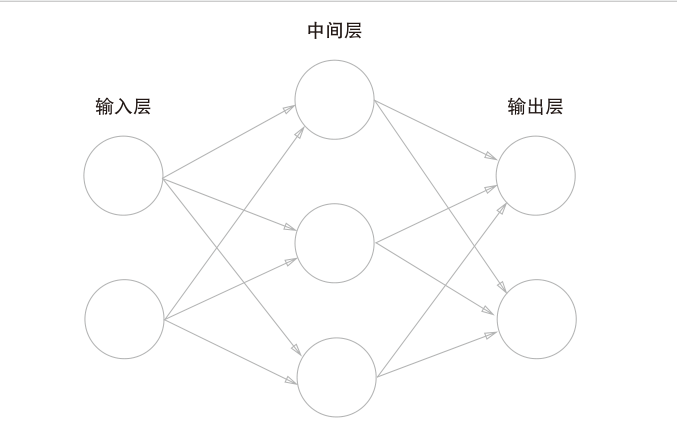

在上图中，最左边的一列被称为输入层，而最右边的一列称为输出层，两者之间的被称为中间层，中间层有时候也被称为隐藏层。

输入层和输出层是可以见的，人们可以知道被输入的内容是什么，最终得到的结果是什么，但是中间层是不对使用者可以见的，除非使用开发工具来进行调式的时候才可以发现。

有些书会将上面的网络称为3层网络，但是上面的网络只有2层神经元具有权重，所以也被称为2层网络。这里采用具有权重的网络层数作为层数，也就是：（输入层+隐藏层+输出层）-1。

在观察神经网络中信号的传递方法之前，我们先复习一下感知机。

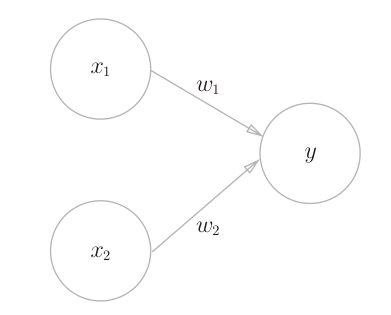

如果使用数学公式，则如下所示：

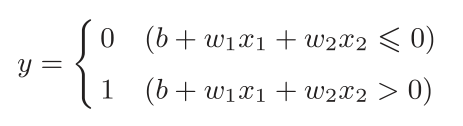

b是被称为偏置的参数，用于控制神经元被激活的容易程度；而w1和w2是表示各个信号的权重的参数，用于控制各个信号的重要性。

注意：上图并没有表现出来编制项b。如果需要，参考下图：

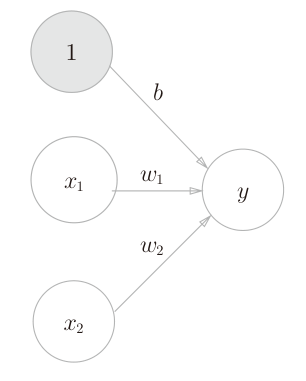

这个感知机将 $x_1, x_2, 1$ 三个信号作为神经元的输入，将其和各自的权重相乘后，传至下一个神经元。在下一个神经元中，计算这些加权信号的总和，如果总和超过了0，则输出1，否则则输出0。

上面的公式可以修改成一个新的形式：

$$ y = h(b + w_1 + w_2) $$

如下图所示：

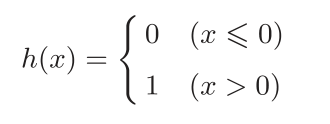

这个 $h(x)$ 函数会将输入信号的总和转换为输出信号，这种函数被称为 **激活函数（activation function)** 。如“激活”一词所示，激活函数的作用在于决定如何来激活输入信号的总和。

激活函数的科普视频可以观看：https://www.bilibili.com/video/BV1Jy4y187Ez/?spm_id_from=333.337.search-card.all.click&vd_source=70cc82c6f851aaa826e5c863112d2113

我们可以将之前的函数修改一下，分成两个阶段：

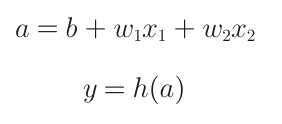

这个公式描述的是一个简单的神经元模型，其中包括两部分：线性变换和非线性激活。

1. **线性变换部分**：

$a = b + w_1x_1 + w_2x_2$

这里，$a$ 表示神经元的加权输入和偏置项的和。其中，$x_1$ 和 $x_2$ 是输入变量，$w_1$和$w_2$ 是相应的权重，$b$ 是偏置项。这部分负责将输入的特征线性组合，形成一个线性的输出结果。

2. **非线性激活部分**：

$y = h(a)$

这里的 $h(a)$ 是激活函数，用于将线性输出 $$ 转换为非线性的输出 $y$。激活函数 $h$ 的具体形式可以是ReLU、Sigmoid、Tanh等，它的作用是引入非线性因素，使得神经网络能够学习和模拟非线性关系。

总的来说，$a$是输入信号经过线性变换的结果，而 $y$ 是这个结果经过激活函数处理后的输出，这个输出将作为下一层的输入或者是网络的最终输出。这样的结构帮助神经网络处理和学习复杂的数据模式。
可以表示为如下图：

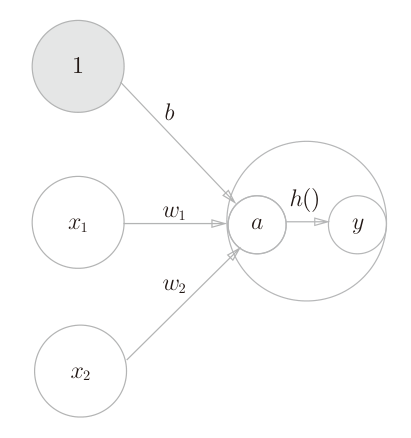

通常如下图所示：

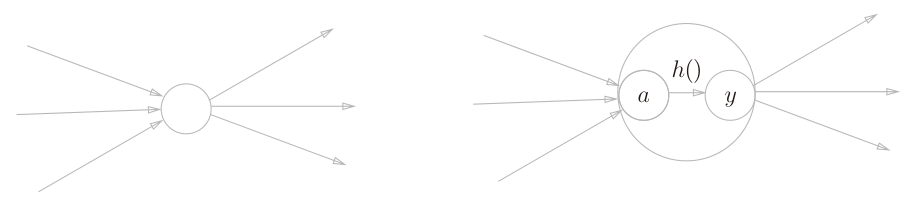

神经元用一个○表示。

通常来讲，“朴素感知机”是指单层网络，指的是激活函数使用了阶跃函数的模型。

“多层感知机”是指神经网络，即使用sigmoid函数（后述）等平滑的激活函数的多层网络。

# 激活函数

激活函数在神经网络中扮演着至关重要的角色。它们主要的作用是引入非线性因素到网络中，这使得神经网络可以学习和执行更为复杂的任务，如图像识别、语言翻译等。如果没有激活函数，无论网络有多深，最终都相当于一个线性回归模型，这极大限制了其表达能力和复杂性。

激活函数的种类有很多，常见的几种包括：

1. **Sigmoid函数**：它能够将任何值压缩至0和1之间，经常用于二分类问题中。但是它有梯度消失的问题，即在输入值很大或很小的情况下，梯度接近0，这会导致网络在学习过程中效率低下。

2. **ReLU函数（线性修正单元）**：这是目前最常用的激活函数之一。它将所有负值置为0，而保持正值不变。ReLU的优点是计算简单，收敛速度快，但它也存在死亡ReLU问题，即一些神经元可能永远不会被激活，导致相关信息丢失。

3. **tanh（双曲正切函数）**：这个函数将值压缩到-1和1之间，它比Sigmoid函数的输出更为标准化，这通常使得学习效率更高。但它仍然具有梯度消失的问题。

4. **Softmax函数**：常用于多分类神经网络输出层，将输出值转化为概率分布。

每种激活函数都有其优势和适用的场景。选择哪种激活函数通常取决于具体的应用需求以及网络的具体结构。

**sigmoid函数**

Sigmoid 函数是一种常用的激活函数，其特点是能够将输入值压缩到 0 和 1 之间。这使其在某些情况下非常适用于表示概率或进行二分类任务，如在神经网络的输出层用于预测类别概率。

Sigmoid 函数的数学表达式是：
$\sigma(x) = \frac{1}{1 + e^{-x}}$

1. **输出范围**：Sigmoid 函数的输出值范围在 0 到 1 之间，这一特性使得它在早期的神经网络中常被用于输出层，尤其是在需要输出概率值的场合。

2. **平滑梯度**：这个函数是可微的，这意味着我们可以在任何点上找到其梯度，并用于进行反向传播算法。梯度的公式为 $\sigma(x) \cdot (1 - \sigma(x))$。

3. **梯度消失问题**：Sigmoid 函数的最大缺点是在输入值较大或较小的时候，梯度会接近于 0。这种情况下，进行反向传播时，权重的更新非常缓慢，从而导致网络训练效率降低，这就是所谓的“梯度消失”问题。

4. **输出非零中心化**：Sigmoid 函数的输出明显不是以 0 为中心的（而是 0.5），这可能导致训练过程中的优化问题，因为每层的输出都会被推向正数，可能会影响权重的调整。

尽管存在一些缺点，Sigmoid 函数由于其历史悠久和在特定应用中的实用性，仍然是深度学习领域内一个重要的工具。

**阶跃函数**

阶跃函数是一种数学函数，其值在某个特定点（通常是 \( x = 0 \)）突然从一个常数值跳跃到另一个常数值。最常见的阶跃函数是单位阶跃函数，也称为Heaviside函数，通常定义为：

$$
H(x) = 
\begin{cases} 
0 & \text{if } x < 0 \\
1 & \text{if } x \geq 0
\end{cases}
$$

这个函数在 $x = 0$ 处从0跳跃到1。阶跃函数在工程和物理学中非常有用，特别是在控制系统和信号处理领域。它可以用来描述在某一时刻突然发生的变化，比如电路中的开关突然打开或关闭。

在神经网络领域，阶跃函数曾经被用作神经元的激活函数。激活函数的作用是决定一个神经元是否应该被激活，即它帮助神经元对输入信号进行有意义的处理。阶跃函数将输出简化为二元形式，即当输入信号超过某个阈值时输出1，否则输出0。这种特性使得阶跃函数在某些早期的神经网络模型中非常适用。

阶跃函数的优点：
- 简单明了：阶跃函数的定义非常简单，当输入超过阈值时激活，否则不激活。这种二值输出使得其在早期的二分类问题中易于实现和理解。
- 决策清晰：由于输出只有两种状态（0和1），使得神经元的决策非常明确，没有中间态。

阶跃函数的缺点：
- 不连续：阶跃函数在阈值点处不连续，这种突变使得其在数学处理上不够平滑，尤其是在需要计算梯度时。
- 无法进行梯度下降：由于阶跃函数几乎处处导数为零（除了阈值点，其导数是未定义的），这导致在使用基于梯度的优化算法时，如反向传播算法，无法有效更新权重，因此实际应用中很少使用。
- 缺乏灵活性：阶跃函数的输出非常极端，只有0或1，这限制了模型表达连续性变化的能力。

**阶跃函数的实现和可视化**

In [55]:
# 基于实数的阶跃函数实现
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

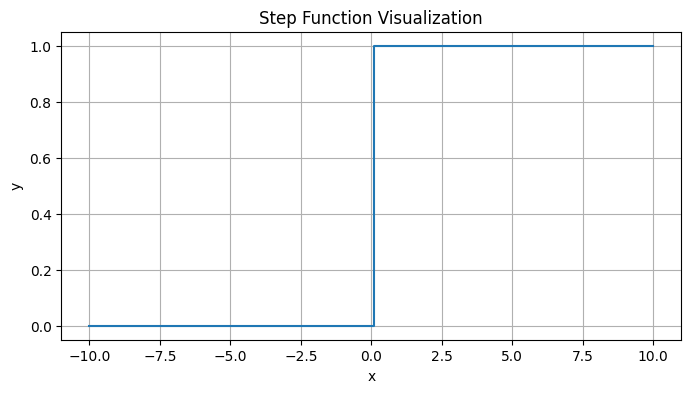

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# 定义阶跃函数
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

# 生成x值的数组
x = np.linspace(-10, 10, 100)
# 对每个x值应用阶跃函数
y = np.array([step_function(xi) for xi in x])  # 这里进行了遍历操作

# 绘制函数图像
plt.figure(figsize=(8, 4))  # 设置图像大小
plt.plot(x, y, drawstyle='steps-post')  # 使用steps-post来更明显地显示阶跃
plt.title("Step Function Visualization")  # 添加标题
plt.xlabel("x")  # x轴标签
plt.ylabel("y")  # y轴标签
plt.grid(True)  # 显示网格
plt.show()

In [57]:
# 修改一下，直接调用numpy的数组
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [58]:
# numpy的广播机制
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
# 广播机制
y = x > 0
print(y)

[False  True  True]


这里的数组y是一个布尔型数组，我们想要的是会输出int型的0或1函数，所以我们需要将数组y的元素类型从布尔型转换为int型：

In [59]:
y = y.astype(int)
y

array([0, 1, 1])

In [60]:
# 修改阶跃函数，使其可以接收 怒骂朋友的数组
def step_function(x):
    y = x > 0
    return y.astype(int)

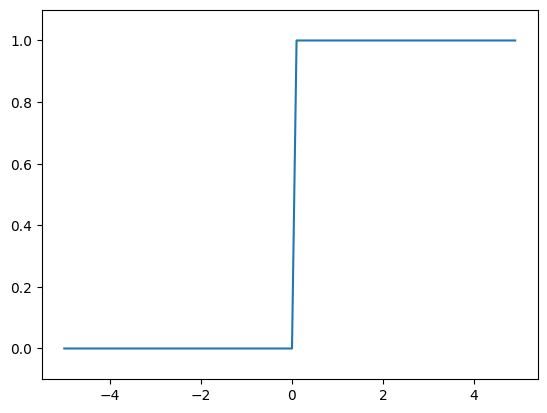

In [61]:
# 使用更新之后的函数绘制新的图像
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype = int)

x = np.arange(-5.0, 5.0, 0.1)  # 从-5.0开始，到5.0结束，间隔为每0.1
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # 指定y轴的范围
plt.show()

**sigmoid函数的实现与可视化**

首先实现sigmoid函数：

In [62]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

当参数x为numpy的数组的时候，函数同样能够很好的运行：

In [63]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

如果在标量和numpy的数组之间进行运算，则可以使用广播机制。

接着开始进行绘制：

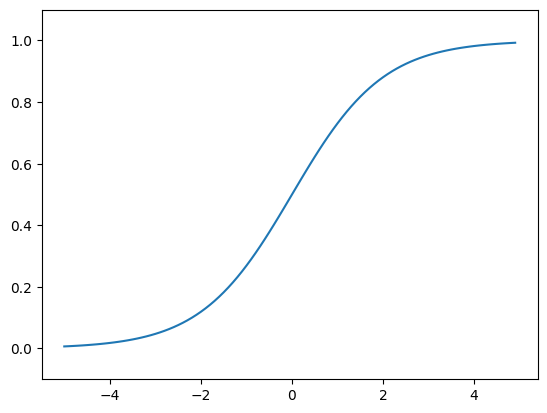

In [64]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

对两个函数进行同时实现和可视化：

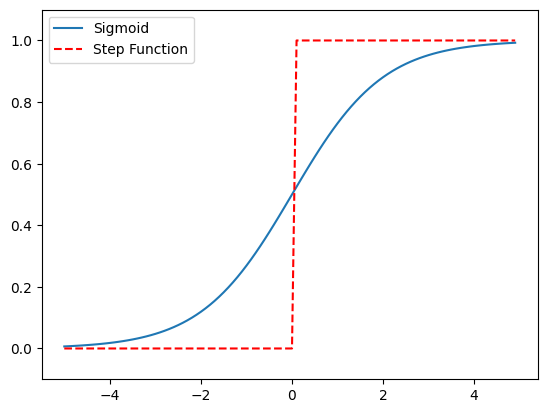

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def step_function(x):
    return np.array(x >= 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y_sigmoid = sigmoid(x)
y_step = step_function(x)

plt.plot(x, y_sigmoid, label='Sigmoid')
plt.plot(x, y_step, 'r--', label='Step Function')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

通过比较可以发现：sigmoid函数是具有平滑性的，输出会随着输入发生连续性的变化，而阶跃函数则是以0为界限，数据直接从0“阶跃”到1。平滑性对于神经网络学习具有着非常重要的意义，涉及到了可导和梯度下降。

Sigmoid函数和阶跃函数也存在着共同点：
- 两者的结构相同：输入小的时候，输出接近与0；输入大的时候，输出接近与1
- 不管输入信号有多小或者有多大，输出信号都会在0到1之间
- 两者都是非线性函数，而非线性函数则是激活函数所需的，因为线性函数的组合只会在最终得到线性函数的结果

**ReLU函数**

ReLu函数的原理非常的简单：
- 在输入大于0的时候，输出输入值
- 在输入值小于等于0的时候，输出0值

ReLU函数，即线性整流单元（Rectified Linear Unit），是神经网络中常用的激活函数。ReLU函数的数学表达式非常简单，定义如下：

$
\text{ReLU}(x) = \max(0, x)
$

这意味着如果输入 $x$ 小于0，则输出0；如果 $x$ 大于或等于0，则输出 $x$ 本身。 ReLU函数因其计算简单和效果良好，在深度学习模型中被广泛应用。

In [66]:
# 该函数的实现非常的简单
def relu(x):
    return np.maximum(x, 0)  # 在0和x中选择一个最大的numpy的array返回

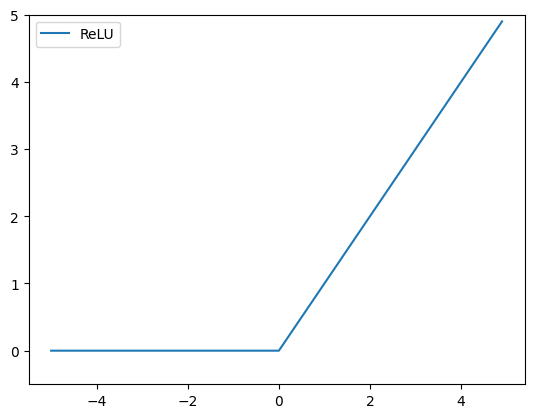

In [67]:
# 可视化一下
x = np.arange(-5.0, 5.0, 0.1)
y_relu = relu(x)

plt.plot(x, y_relu, label='ReLU')
plt.ylim(-0.5, 5.0)
plt.legend()
plt.show()

ReLU函数不是一个全线性函数，但它具有分段线性的特性。这意味着它在不同的输入区间上表现为线性，但整体上并非是一个线性函数。

具体来说，ReLU函数在 $x \geq 0$的区域是线性的，因为在这个区域内，函数输出直接等于输入 $x$。然而，在 $x < 0$ 的区域，输出恒为0，这是一个常数输出，并不随输入 $x$ 的变化而变化，因此在这部分它不是线性的。

因此，可以认为ReLU是一个分段线性函数，它结合了线性和非线性的特点，这也是它在神经网络中广泛使用的原因之一，它可以帮助处理和传递非线性关系。

线性函数和线性函数的组合仍能用另一个线性函数表示，这是线性函数的一个重要特性：它们是封闭的，意味着多个线性函数的组合还是一个线性函数。然而，分段线性函数虽然不是完全线性的，但在神经网络和其他机器学习模型中它们非常有用，原因包括：

1. **非线性引入**：神经网络需要非线性激活函数来帮助模型学习和表示复杂的函数或决策边界。如果仅使用线性函数，无论网络有多少层，输出都仅是输入的线性组合，这限制了网络处理非线性问题的能力。分段线性函数（如ReLU）提供了一种简单的非线性形式，允许网络捕捉输入之间的非线性关系。

2. **计算效率**：分段线性函数，尤其是ReLU，计算简单高效。这种效率对于训练大规模深度学习模型非常重要，因为它减少了计算时间和资源消耗。

3. **梯度消失问题减轻**：在深度神经网络中，使用诸如Sigmoid或Tanh这类饱和激活函数可能会导致梯度消失问题，这使得网络在训练过程中难以更新深层神经元的权重。分段线性函数如ReLU，在 $x > 0$时具有恒定的梯度（即1），这有助于缓解梯度消失问题，使得深层网络更易于训练。

4. **稀疏激活**：ReLU及其变体通过在一定条件下输出零，引入了输出的稀疏性。这种稀疏性有助于模型的正则化，即减少模型的过拟合风险，并可能提高模型的泛化能力。

因此，尽管分段线性函数不具备线性函数的一些数学属性（如完全线性），但它们在实际应用中展示了对于处理复杂模式和大规模数据的独特优势。这使得它们在现代机器学习和人工智能领域中非常受欢迎。

对于分段线性函数，比如ReLU，任何给定的输入值 $x$都将落在某个特定的线性部分上。例如，在ReLU函数中，所有正数输入 $x > 0$ 都直接输出其本身（线性部分），而所有非正数$ x \leq 0$的输出为0（常数，可以看作斜率为0的线性部分）。

虽然每个单独的输入值都对应于函数的某个线性段，但整体函数结构并不是全局线性的。全局线性意味着无论输入如何变化，输出都是输入的一个固定线性组合，即存在形如 $f(x) = ax + b$的关系适用于所有 \$x$。然而，分段线性函数在不同的输入段上有不同的线性关系（或者常数输出），并且在这些分段的交界处存在不连续的导数或斜率变化。

这种在不同区段具有不同线性行为的特点是分段线性函数的关键，它允许函数模拟并处理非线性现象。即便在局部看起来是线性的，整体函数依旧可以通过组合多个线性段来适应和学习非线性的数据模式。这是分段线性函数在神经网络中特别有用的原因之一：它们可以很好地平衡计算效率和模型复杂性，同时提供足够的非线性能力来处理复杂的问题，而不至于引入过多的计算负担。

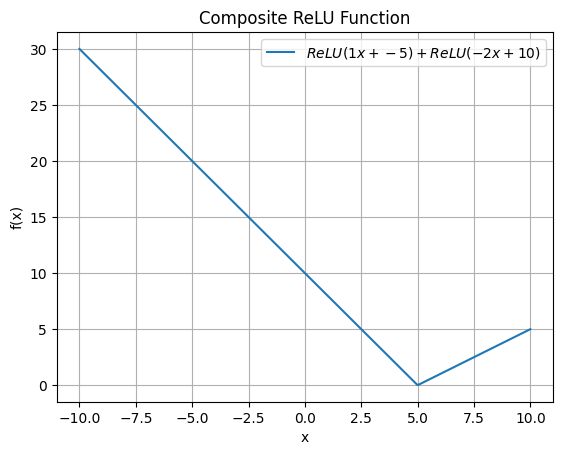

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU函数定义
def relu(x):
    return np.maximum(0, x)

# 定义一个由两个ReLU组成的复合函数
def composite_relu(x, a1, b1, a2, b2):
    return relu(a1 * x + b1) + relu(a2 * x + b2)

# 生成输入数据
x = np.linspace(-10, 10, 400)

# 参数设置，可以调整这些参数来观察不同的输出
a1, b1 = 1, -5
a2, b2 = -2, 10

# 使用参数计算复合ReLU函数的输出
y = composite_relu(x, a1, b1, a2, b2)

# 绘制图形
plt.plot(x, y, label=f'$ReLU({a1}x + {b1}) + ReLU({a2}x + {b2})$')
plt.title("Composite ReLU Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

只要最终的图像不是一条直线，就表明函数具有非线性特征。这种非线性是由ReLU函数的分段线性特性组合产生的。在神经网络中，非线性是极其重要的，因为它允许模型学习和适应更加复杂的数据模式和关系，超越简单的线性关系。

当多个ReLU函数组合在一起时，即便每个单独的ReLU部分都是线性的，组合起来的结果可以形成复杂的函数形态，这种形态可以有多个折点（bend points）和不同的斜率。这样的组合使得整体函数表现出非线性的特征，能够进行复杂的决策边界划分，这是处理分类和回归问题时非常需要的。

此外，通过增加ReLU函数的数量或修改神经网络中的层和节点数，可以进一步增强模型的非线性表达能力和学习复杂度，从而提高模型对于各种复杂任务的适应性和准确性。

# 多维数组

使用Numpy来实现。

In [69]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [70]:
np.ndim(A)

1

In [71]:
A.shape

(4,)

In [72]:
A.shape[0]

4

A就是一个1维数组，shape为(4, )也就是只有4个元素，shape[0]也就是元素的数量。

In [73]:
B = np.array(
    [
        [1, 2],
        [3, 4],
        [5, 6]
    ])

这是一个3 * 2 的数组，这意味着第一个维度有3个元素，第二个维度有2个元素。

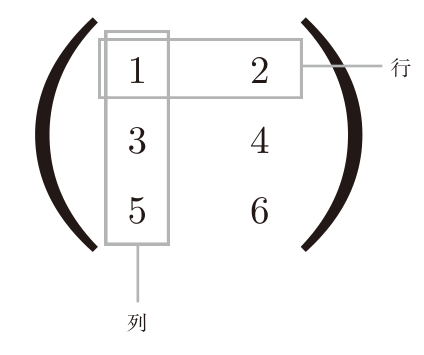

通常来讲，同一个列表示的是同一个特征，而同一行则是同一个样本的不同特征，所以先考虑列的情况，然而考虑行的情况，这与数学上给矩阵先写n行，后写m列是相反的。

矩阵的乘法如下图所示：

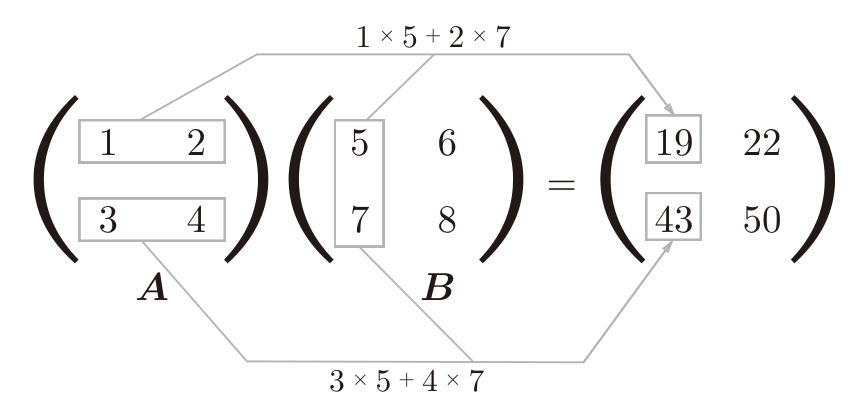

In [74]:
# Python语言的代码实现
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

result = A.dot(B)
print(result)

[[19 22]
 [43 50]]


In [75]:
# 切换位置
B.dot(A)

array([[23, 34],
       [31, 46]])

可以发现，A.dot(B)和B.dot(A)的结果是不一样的。

In [76]:
# (n * m) * (m * n)
C = np.array([[1, 2, 3], [4, 5, 6]])
D = np.array([[1, 2], [3, 4], [5, 6]])

print(C.shape[0])
print(D.shape[1])

print(C.dot(D))

2
2
[[22 28]
 [49 64]]


In [77]:
# 如果前者的列数和后者的行数并不相同，则会报错
E = np.array([[1, 2], [1, 2]])
print(E.shape[0])

2


In [78]:
try:
    result = np.dot(C, E)
    print("Matrix C dot E result:\n", result)
except ValueError as e:
    print("Error:", e)

Error: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)


会给出报错，需要再次强调，shape给出来的是(列，行)而不是（行，列）。

接着计算神经网络的内积：

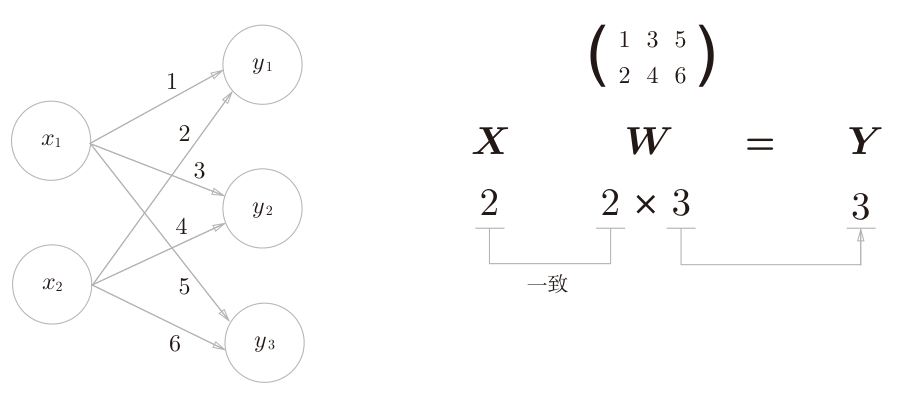

In [79]:
X = np.array([1, 2])
X.shape

(2,)

In [80]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [81]:
W.shape

(2, 3)

In [82]:
# 两者需要时相同的
X.shape[0] == W.shape[1]  # 前者的列（shape[0]）需要等于后者的行(shape[1])

False

In [83]:
# 然后计算内积
dot_product = X.dot(W)
print(dot_product)

[ 5 11 17]


可以发现，通过矩阵和矩阵乘法，可以很好的得到想要的结果。

# 三层神经网络的实现

结构如下图所示：

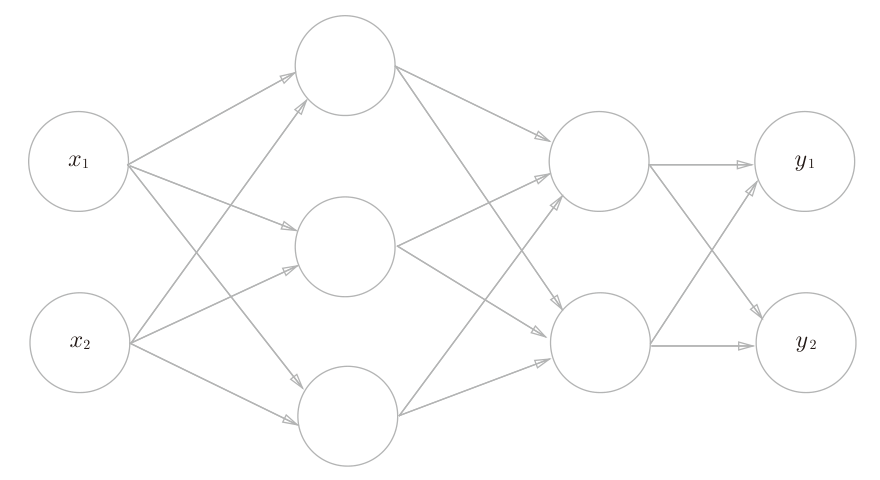

3层神经网络：输入层（第0层）有2个神经元，第1个隐藏层（第1层）有3个神经元，第2个隐藏层（第2层）有2个神经元，输出层（第3层）有2个神经元

符号表示如下图所示：

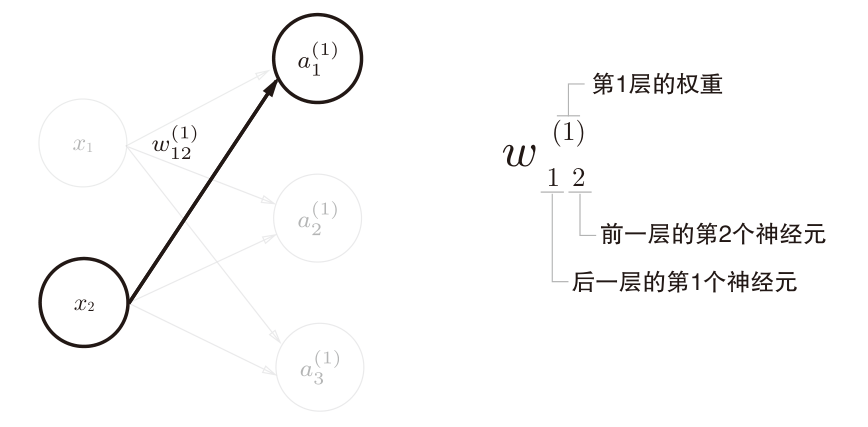

从输入层到第一层的第1个神经元的信号传递过程：

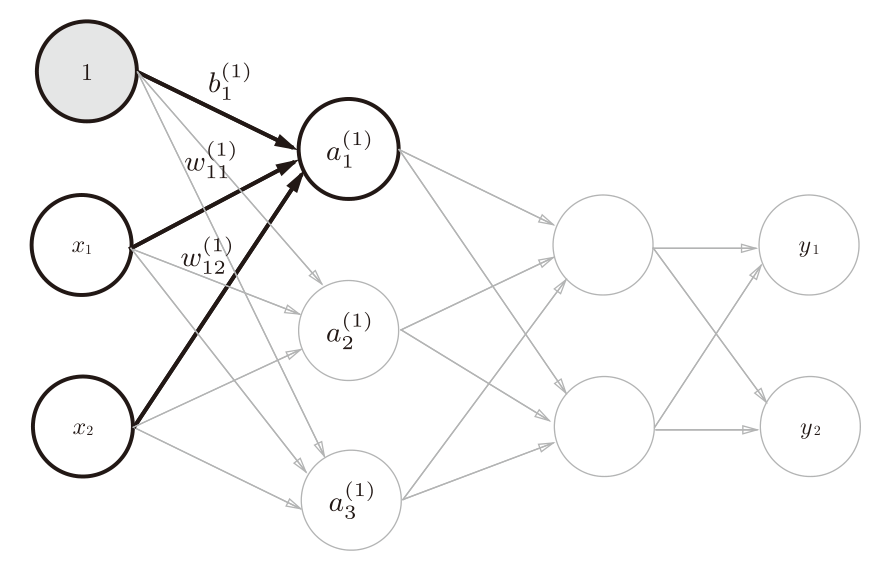

需要注意偏置项只有 $b_1$ 而不是 $b_{1, 1}$，因为前一层只存在着一个偏置项神经元。

最终的数学表达式如下所示：

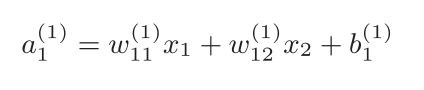

如果使用矩阵的乘法运算，则可以将第1层的加权和表示成下面的式子：

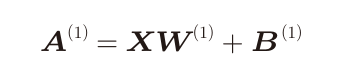

其中各个项的表示为：

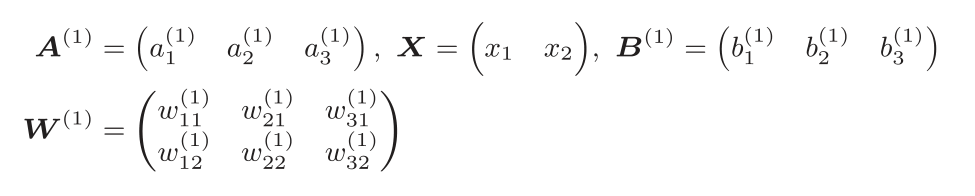

In [84]:
# 使用python语言代码来进行实现
X = np.array([1.0, 0.5])  # 第0层的两个输入神经元
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  # 表示权重矩阵
B1 = np.array([0.25, 0.65, 0.95])  # 权重

In [85]:
print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


使用点积运算来得到输入值：

In [86]:
A1 = np.dot(X, W1) + B1  # 得到输入的a11

In [87]:
# 然后进行激活函数进行转换得到一个输出值
Z1 = sigmoid(A1)

图示如下图所示：

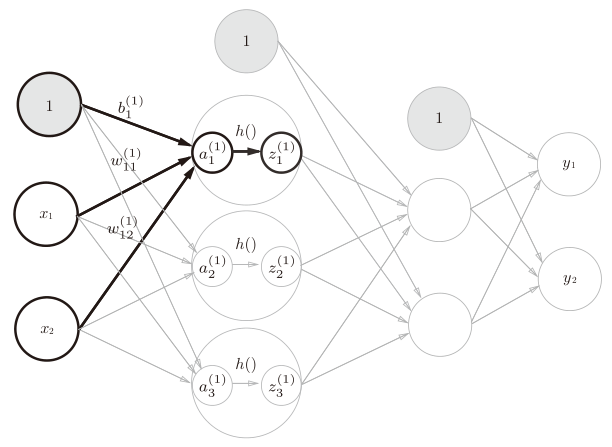

In [88]:
print(A1)
print(Z1)

[0.45 1.15 1.75]
[0.61063923 0.75951092 0.8519528 ]


这就是第一层的每个神经元得到的输入，和使用了激活函数之后进行的输出。

接着我们可以模拟从第一层到第二层的信号传递：

In [89]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


除了第1层的输出（Z1）变成了第2层的输入这一点以外，这个实现和刚才的代码完全相同。

从第一层的输出到第二层的图示可以参考：

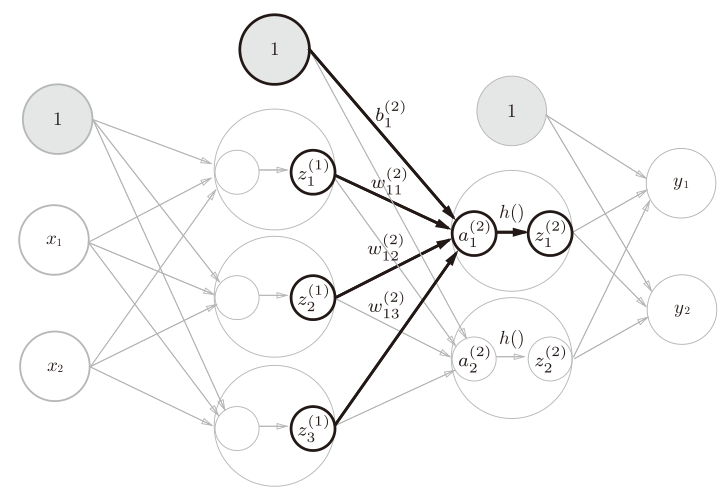

最后就是第二层到输出层的信号传递：

In [90]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 或者Y = A3

这里我们定义了 identity_function()函数（也称为“恒等函数”），并将其作为输出层的激活函数。恒等函数会将输入按原样输出，因此，这个例子
中没有必要特意定义 identity_function()。这里这样实现只是为了和之前的流程保持统一。

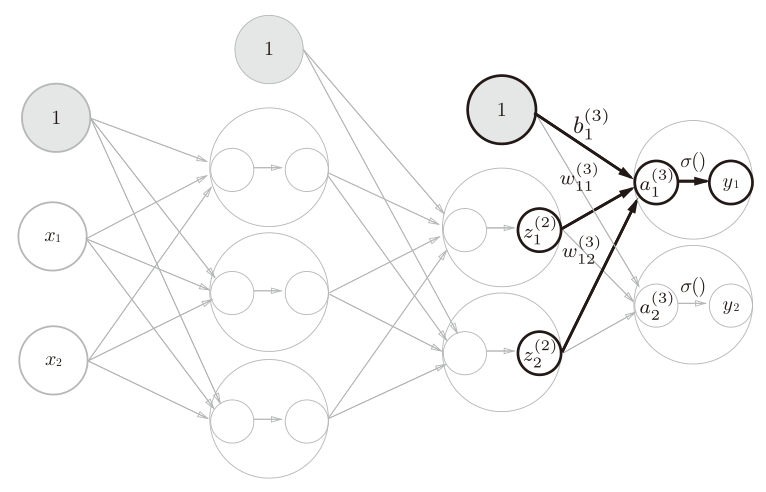

输出层所用的激活函数，要根据求解问题的性质决定。一般地，回归问题可以使用恒等函数，二元分类问题可以使用sigmoid函数，多元分类问题可以使用softmax函数。

In [91]:
def init_network():
    network = {}  # 这里生成了一个字典，然后将对应的权重和偏置等内容保存在字典中
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

# 前向传播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]


# 输出层的设计

机器学习的问题大致可以分为分类问题和回归问题。分类问题是数据属于哪一个类别的问题。

恒等函数会将输入按原样输出，对于输入的信息，不加以任何改动地直
接输出。

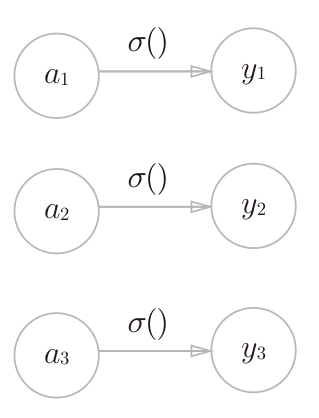

分类问题中使用的softmax函数可以用下面的式来进行表示：

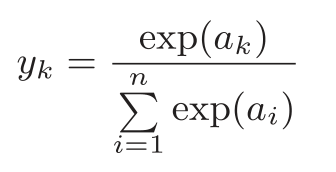

这个函数是 **Softmax 函数**的一个组成部分，它常用于机器学习中的分类任务。Softmax 函数将一个实数向量转换为一个概率分布，其中每个元素的范围都在0到1之间，并且所有元素的和为1。这使得Softmax非常适合用作多类分类问题的输出层，每个输出代表一个类别的概率。


- **$a_k$**：是输入向量中的第 $k$ 个元素，通常代表某个类别在未归一化的预测下的对数几率（logits）。
- **$\text{exp}(a_k)$**：是 $a_k$ 的指数。指数函数用于确保所有输出为正数，同时放大了较大输入值的差异，这有助于后续的分类决策。
- **分母 $\sum_{i=1}^n \text{exp}(a_i)$**：是对整个输入向量的指数求和，这确保了当我们对单个 $\text{exp}(a_k)$ 归一化时，结果是一个概率分布。
- **$ y_k $**：表示输入向量属于第 $k$ 类的概率。通过Softmax函数的处理，每一个输出都介于0和1之间，所有输出的总和恰好为1。

Softmax 函数使得模型的输出可以直接解释为概率，这对于分类任务特别有用，因为它提供了一种明确的方式来选择预测类别（即选择概率最高的类别）。在训练神经网络时，Softmax通常与交叉熵损失函数结合使用，以优化分类效果。

用图表示softmax函数的话，如图所示。

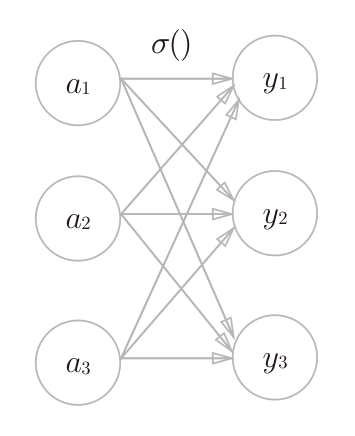

输出层的各个神经元都受到所有输入信号的影响。

In [92]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [93]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)
y = exp_a / sum_exp_a
print(y)

74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [94]:
y.sum()

1.0

In [95]:
# 写成函数
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

上面的 softmax函数的实现虽然正确描述了式，但在计算机的运算上有一定的缺陷。这个缺陷就是溢出问题。softmax函数的实现中要进行指数函数的运算，但是此时指数函数的值很容易变得非常大。

改进之后的式子：

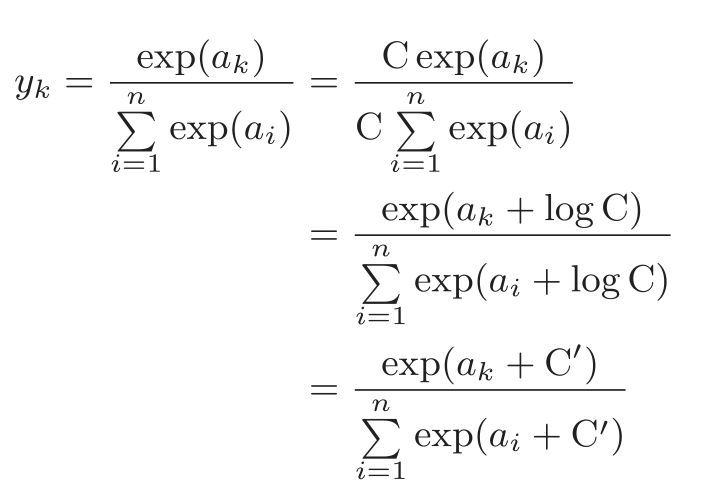

在进行softmax的指数函数的运算时，加上（或者减去）某个常数并不会改变运算的结果。这里的C'可以使用任何值，但是为了防止溢出，一般会使用输入信号中的最大值。

In [96]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

C:\Users\wangj\AppData\Local\Temp\ipykernel_34644\832863605.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\wangj\AppData\Local\Temp\ipykernel_34644\832863605.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [97]:
c = np.max(a) # 1010
a - c

array([  0, -10, -20])

In [98]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

如该例所示，通过减去输入信号中的最大值（上例中的 c），我们发现原本为 nan（not a number，不确定）的地方，现在被正确计算了。

In [99]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

尝试进行计算：

In [100]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [101]:
np.sum(y)

1.0

如上所示，softmax函数的输出是0.0到1.0之间的实数。并且，softmax函数的输出值的总和是1。输出总和为1是softmax函数的一个重要性质。正因为有了这个性质，我们才可以把softmax函数的输出解释为“概率”。

上面的例子可以解释成 y[0]的概率是0.018（1.8 %），y[1]的概率是 0.245（24.5 %），y[2]的概率是 0.737（73.7 %）。

这里需要注意的是，即便使用了softmax函数，各个元素之间的大小关系也不会改变。这是因为指数函数（y = exp(x)）是单调递增函数。

上例中 a的各元素的大小关系和 y的各元素的大小关系并没有改变。比如，a的最大值是第2个元素，y的最大值也仍是第2个元素。

一般而言，神经网络只把输出值最大的神经元所对应的类别作为识别结果。
并且，即便使用softmax函数，输出值最大的神经元的位置也不会变。因此，
神经网络在进行分类时，输出层的softmax函数可以省略。在实际的问题中，
由于指数函数的运算需要一定的计算机运算量，因此输出层的softmax函数
一般会被省略。

# 手写数字识别

我们使用学习到的参
数，先实现神经网络的“推理处理”。这个推理处理也称为神经网络的前向
传播（forward propagation）。

这里使用的数据集是MNIST手写数字图像集。MNIST是机器学习领域
最有名的数据集之一，被应用于从简单的实验到发表的论文研究等各种场合。

MNIST数据集是由0到9的数字图像构成的。训练图像有6万张，测试图像有1万张，这些图像可以用于学习和推理。MNIST数据集的一般使用方法是，先用训练图像进行学习，再用学习到的模型度量能在多大程度上对测试图像进行正确的分类。

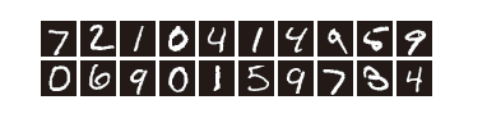

MNIST的图像数据是28像素 × 28像素的灰度图像（1通道），各个像素的取值在0到255之间。每个图像数据都相应地标有“7”“2”“1”等标签。

In [102]:
import sys, os
sys.path.append(os.pardir)  # pardir是parent directory的合并缩写
from dataset.mnist import load_mnist  # 可能会报错，因为服务器拒绝爬虫，但是可以将文件收到下载到同一个目录中

(x_train,t_train),(x_test,t_test)=load_mnist(flatten=True,normalize=False)

In [103]:
# 输出一下各个数据的形状
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


图像是： 1 x 28 x 28 的三维数组，但是在flatten=True的情况之下，将三维展开为了一维数组。

In [104]:
# 接着来显示一下图像
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img= Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)
img = img.reshape(28, 28)  # 转换回来
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


得到的结果为：

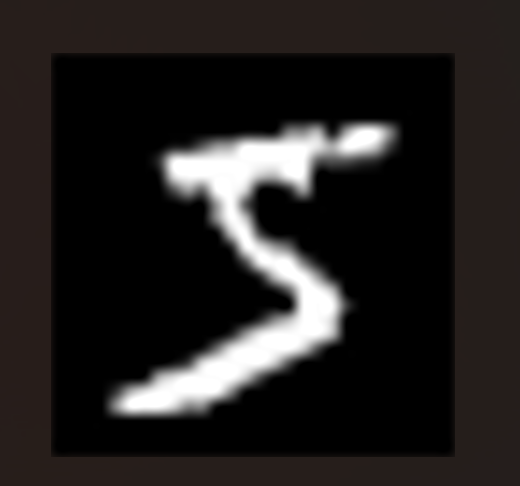

flatten = True在读取图像的时候使用了一维NumPy数组的形式来存储数据，所以需要使用reshape()函数来对其进行转换回来，然后对于转换回来的NumPy数组使用了Image.fromarray()函数来进行显示。

接着是对神经网络的推理处理。

神经网络的输入层有784个，而输出层有10个神经元。输入层的784这个数字来自于图像的28*28=784，而输出层的10个数字则来自于10个类别的分类（从0~9）。

In [108]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [111]:
# 还是调用了mnist.py这个程序中的函数
x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])  # 得到各个标签的对应的概率
    p = np.argmax(y)  # 去除最大的概率的索引
    if p == t[i]:  # 和真实的值进行比对
        accuracy_cnt += 1  # 如果符合则准确率+1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # 准确数量/总数量，得到准确率

Accuracy:0.9352


In [112]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [113]:
x.shape

(10000, 784)

In [114]:
x[p].shape

(784,)

In [115]:
W1.shape

(784, 50)

In [116]:
W2.shape

(50, 100)

In [117]:
W3.shape

(100, 10)

流程图如下所示：

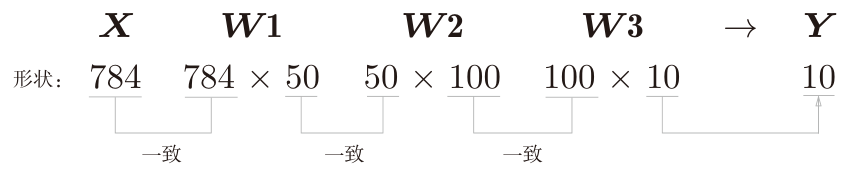

我们可以考虑一次性输入更多的图像：

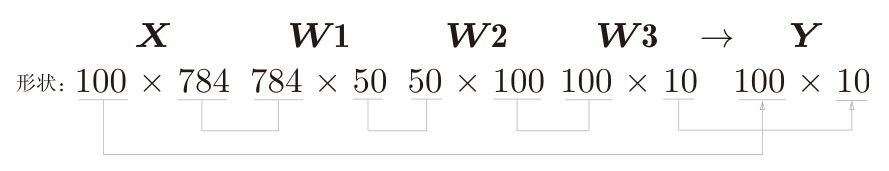

In [119]:
# 批处理
x, t = get_data()
network = init_network()

batch_size = 100 # 批处理
accuracy_cnt = 0

for i in range(0, len(x), batch_size):  # [0, 100], [100, 200]
    x_batch = x[i: i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy" + str(float(accuracy_cnt) / len(x)))

Accuracy0.9352
